In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os

In [2]:
# Data Loading and Preprocessing
#data_path = "path/to/images_folder"
dataset_path = os.getcwd()
data_path = os.path.join(dataset_path, 'Data')
p=100
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((p, p))  # Resize images if needed
        # Convert RGB image to grayscale
        img_gray = img.convert('L')
        # Normalize pixel values
        img_array = np.array(img_gray) / 255
        # Expand dimensions to add channel dimension (for compatibility with CNN models)
        img_array = np.expand_dims(img_array, axis=-1)
        images.append(img_array)
        label = filename.split('.')[0]  # Extract class label from file name
        labels.append(label)
    return np.array(images), np.array(labels)

data, target = load_images(data_path)

data = np.squeeze(data)


In [3]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 315 images in the dataset
There are 35 unique targets in the dataset
Size of each image is 100x100
Pixel values were scaled to [0,1] interval. e.g:[0.05882353 0.08235294 0.08627451 0.11764706]


In [4]:
target=target.astype(int)
print("unique target number:",np.unique(target))

unique target number: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
 27 29 30 31 32 33 35 36 37 38 39]


In [15]:
def show_30_distinct_people(images, unique_ids):
    #Creating 3X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=3, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*9
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 30 distinct people in the dataset")

IndexError: index 30 is out of bounds for axis 0 with size 30

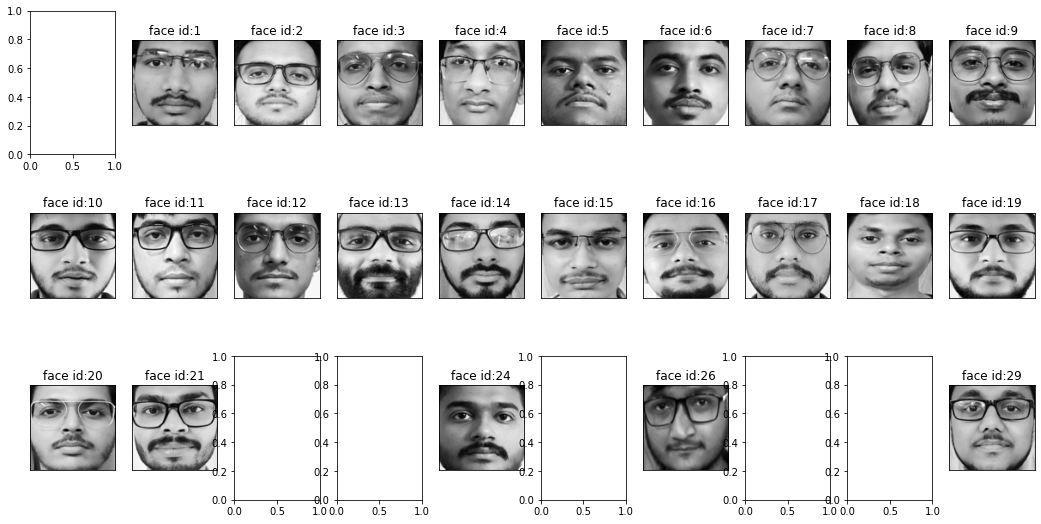

In [16]:
show_30_distinct_people(data, np.unique(target))

In [17]:
def show_9_faces_of_n_subject(images, subject_ids):
    cols=9# each subject has 9 distinct face images
    rows=(len(subject_ids)*9)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*9 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

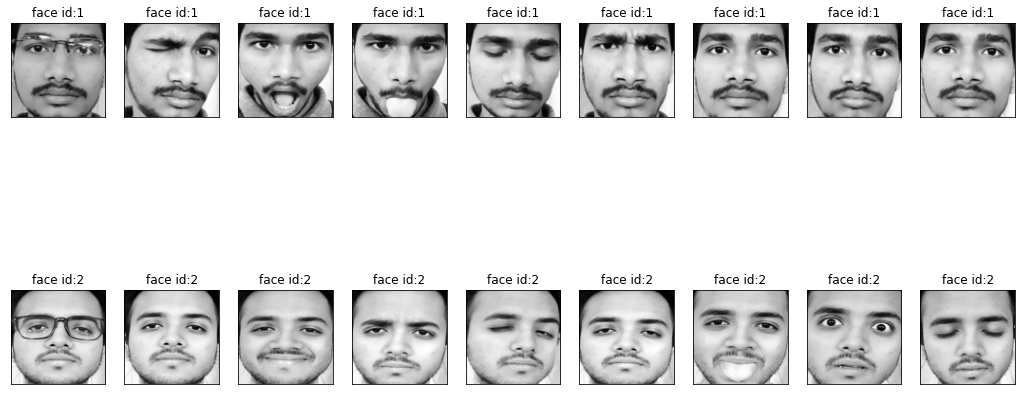

In [18]:
#You can playaround subject_ids to see other people faces
show_9_faces_of_n_subject(images=data, subject_ids=[1,2])

In [5]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (315, 10000)


In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.22, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (245, 10000)
y_train shape:(245,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

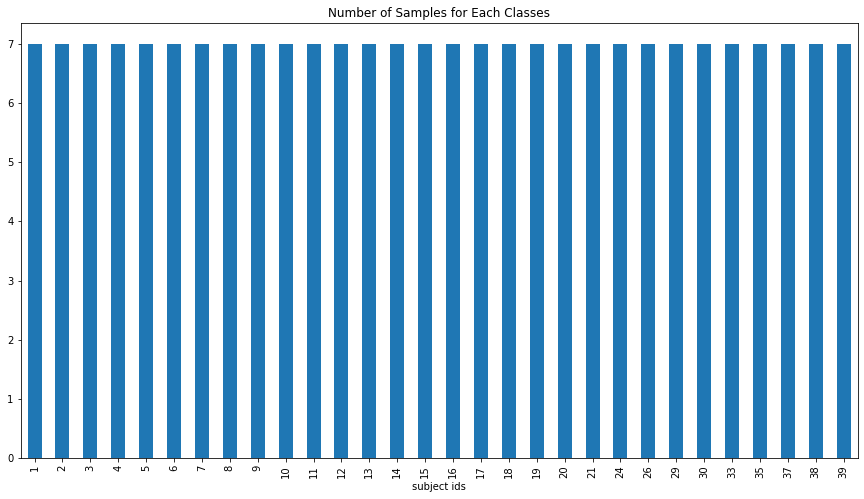

In [23]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

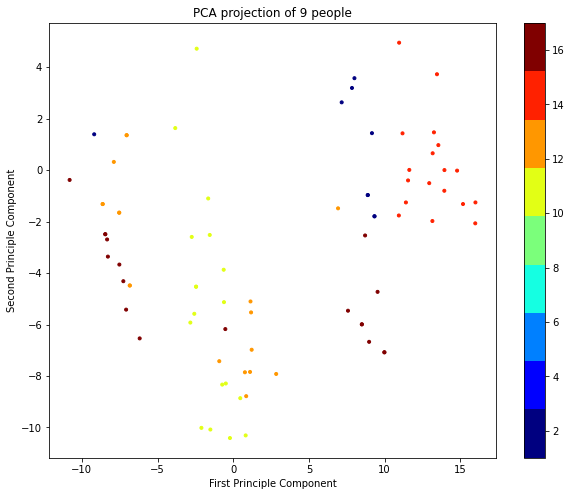

In [25]:
number_of_people=9
index_range=number_of_people*9
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=9,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

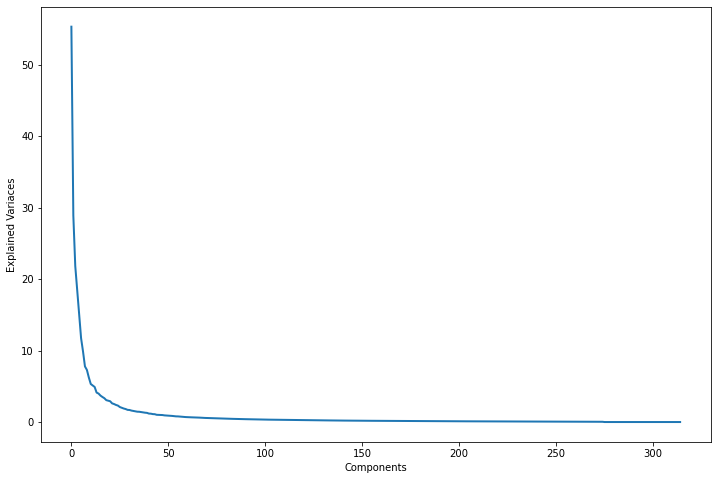

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [8]:
n_components=90

In [9]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

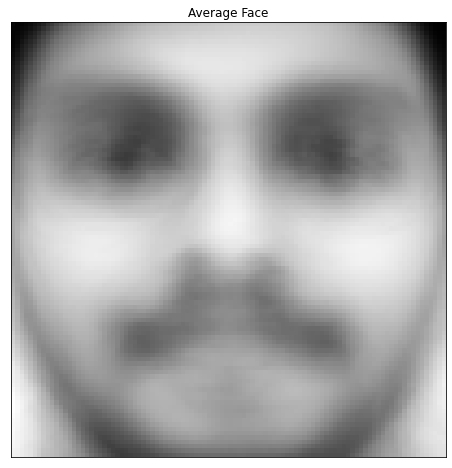

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((100,100)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

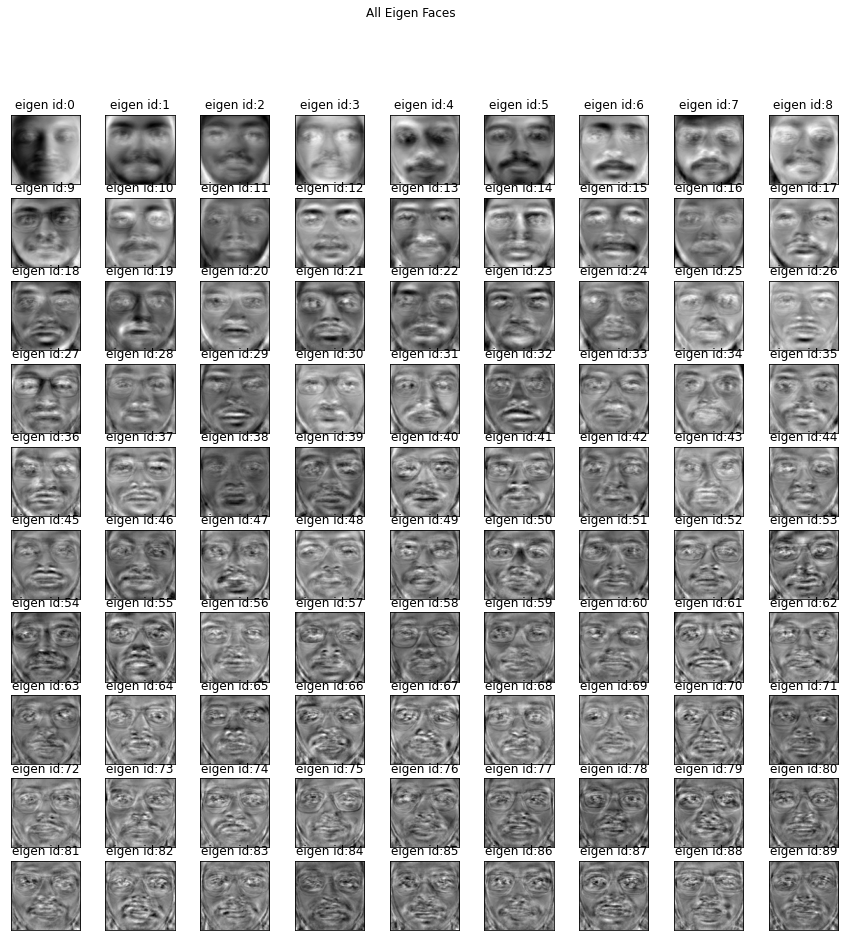

In [11]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=9
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(9*"=", 9*"="))

In [12]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [13]:
X_train_pca.shape

(245, 90)

In [14]:
X_test_pca.shape

(70, 90)

In [15]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.96


<AxesSubplot:>

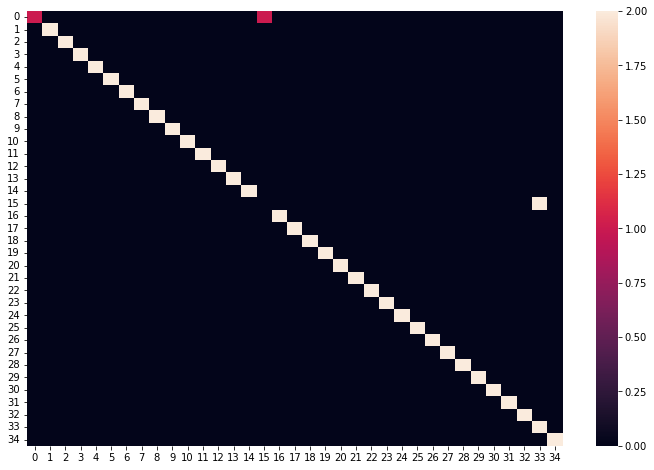

In [16]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       0.00      0.00      0.00         2
          19       1.00      1.00      1.00         2
          20       1.00    

In [18]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.96

========== LR RESULT ==========
Accuracy score:0.94

========== NB RESULT ==========
Accuracy score:0.77

========== KNN RESULT ==========
Accuracy score:0.56

========== DT RESULT ==========
Accuracy score:0.67

========== SVM RESULT ==========
Accuracy score:0.96



In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.94
LR mean cross validations score:0.88
NB mean cross validations score:0.66
KNN mean cross validations score:0.47
DT mean cross validations score:0.56
SVM mean cross validations score:0.73


In [20]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.96


<AxesSubplot:>

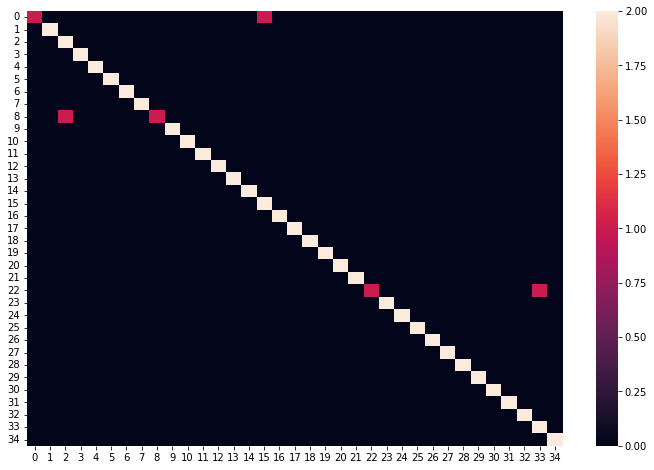

In [21]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

<AxesSubplot:>

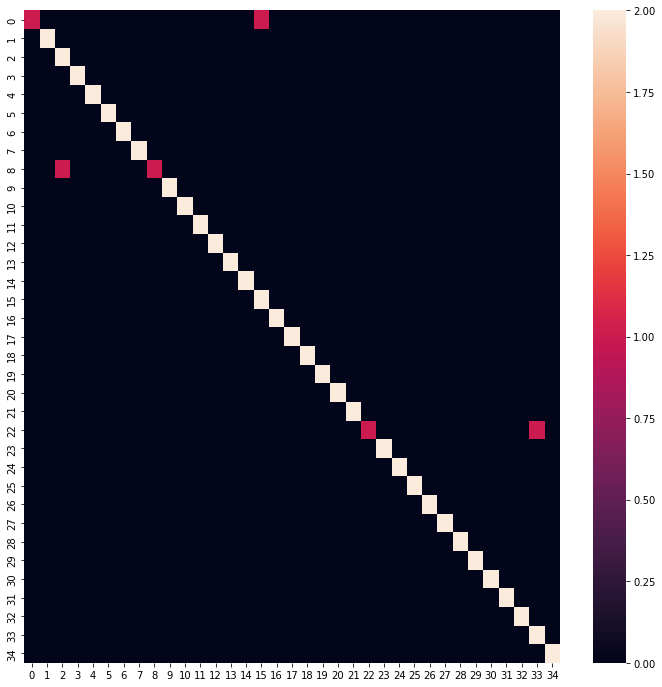

In [22]:
cm=metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sns.heatmap(cm)

In [23]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       0.67      1.00      0.80         2
          19       1.00      1.00      1.00         2
   

In [24]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.91


In [25]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out cross-validation mean accuracy score:0.95


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.model_selection import LeaveOneOut

#This process takes long time. You can use parameter:{'C': 1.0, 'penalty': 'l2'} 
#grid search cross validation score:0.93
"""
params={'penalty':['l1', 'l2'],
                'C':np.logspace(0, 4, 10)
                }
clf=LogisticRegression()
#kfold=KFold(n_splits=3, shuffle=True, random_state=0)
loo_cv=LeaveOneOut()
gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
gridSearchCV.fit(X_train_pca, y_train)
print("Grid search fitted..")
print(gridSearchCV.best_params_)
print(gridSearchCV.best_score_)
print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))
"""


'\nparams={\'penalty\':[\'l1\', \'l2\'],\n                \'C\':np.logspace(0, 4, 10)\n                }\nclf=LogisticRegression()\n#kfold=KFold(n_splits=3, shuffle=True, random_state=0)\nloo_cv=LeaveOneOut()\ngridSearchCV=GridSearchCV(clf, params, cv=loo_cv)\ngridSearchCV.fit(X_train_pca, y_train)\nprint("Grid search fitted..")\nprint(gridSearchCV.best_params_)\nprint(gridSearchCV.best_score_)\nprint("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))\n'

In [45]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr score:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr score:0.93


In [46]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target=label_binarize(target, classes=range(30))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(270, 30)
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.22,
                                                                                             stratify=Target,
                                                                                     random_state=0)

In [48]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca=pca.transform(X_train_multiclass)
X_test_multiclass_pca=pca.transform(X_test_multiclass)

In [49]:
oneRestClassifier=OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 22 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 23 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 25 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 27 is present in all training examples.
  warnings.warn("Label %s is present in all tra

In [50]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],
                                                        y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.78


C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
C:\Users\ShubhankarB\Anaconda3\lib\site-packag

In [51]:
from sklearn.utils.fixes import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

ImportError: cannot import name 'signature' from 'sklearn.utils.fixes' (C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda=lda.transform(X_test)

In [62]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_lda,y_train)
y_pred=lr.predict(X_test_lda)

C:\Users\ShubhankarB\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.95
Classification Results:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00    

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis()))
#work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty="l2")))
model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred1=model_std.predict(X_test)

In [28]:
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred1)))
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred1)))

Accuracy score:0.96
Classification Results:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2
          19       1.00      1.00    

In [46]:
# Data Loading and Preprocessing
#data_path = "path/to/images_folder"
dataset_path = os.getcwd()
data_path = os.path.join(dataset_path, 'Test Data')
p=100
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((p, p))  # Resize images if needed
        # Convert RGB image to grayscale
        img_gray = img.convert('L')
        # Normalize pixel values
        img_array = np.array(img_gray) / 255
        # Expand dimensions to add channel dimension (for compatibility with CNN models)
        img_array = np.expand_dims(img_array, axis=-1)
        images.append(img_array)
        label = filename.split('.')[0]  # Extract class label from file name
        labels.append(label)
    return np.array(images), np.array(labels)

data, target = load_images(data_path)

testdata = np.squeeze(data)

In [47]:
testdata.shape
t=testdata.reshape(testdata.shape[0]*testdata.shape[1])
t1=t.reshape(1,100,100)
t2=t1.reshape((t1.shape[0],t1.shape[1]*t1.shape[2]))
t1.shape
print("data shape:",t2.shape)
test_data_pca=pca.transform(t2)
print("testdata shape:",test_data_pca.shape)
y_pred_test=lr.predict(test_data_pca)
y_pred_test

data shape: (1, 10000)
testdata shape: (1, 90)


array([23])